# Figure 14 - Kubyshkina et al. 2024
https://ui.adsabs.harvard.edu/abs/2024A%26A...684A..26K/abstract

In [ ]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim
from wind_ae.wrapper.wrapper_utils import constants as const

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

Spectrum: https://ui.adsabs.harvard.edu/abs/2012ApJ...757...95C/abstract 
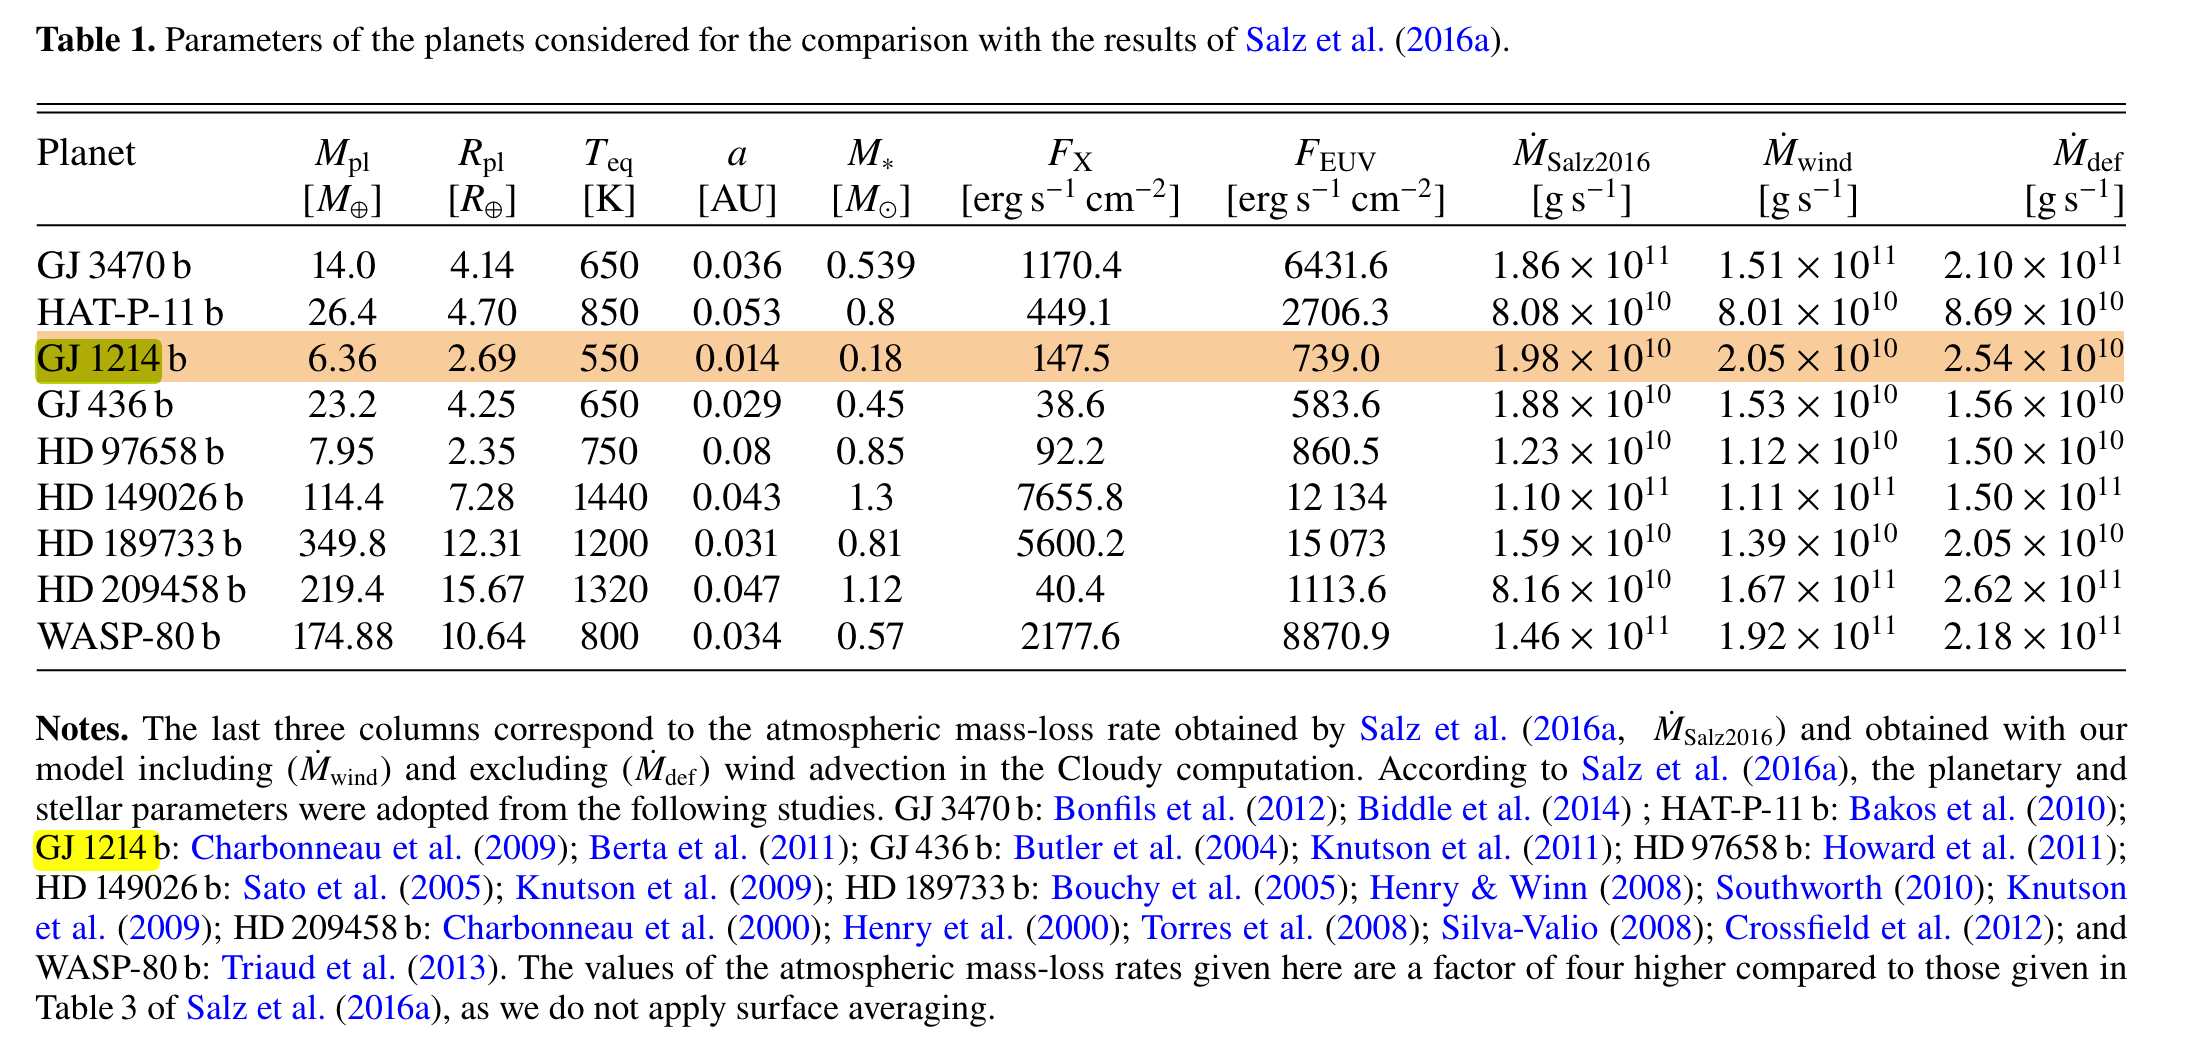

In [3]:
#muscles spectrum
hdu_Xray= fits.open('data/Kubyshkina/hlsp_muscles_model_apec_gj1214_na_v22_component-spec.fits')[1]
hdu_EUV = fits.open('data/Kubyshkina/hlsp_muscles_model_euv-scaling_gj1214_na_v22_component-spec.fits')[1]

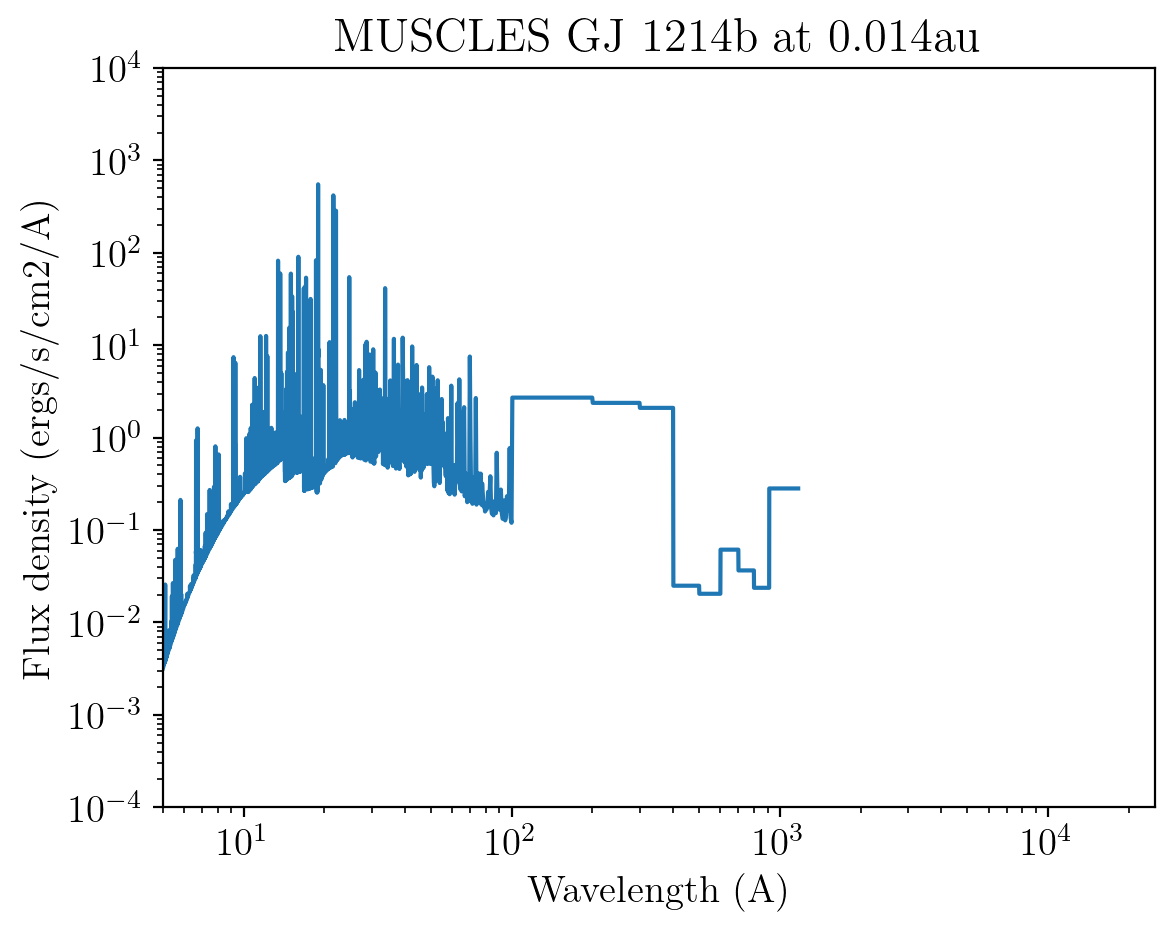

Atmosphere Composition
  Species:   HI,        HeI
  Mass frac: 8.00e-01, 2.00e-01



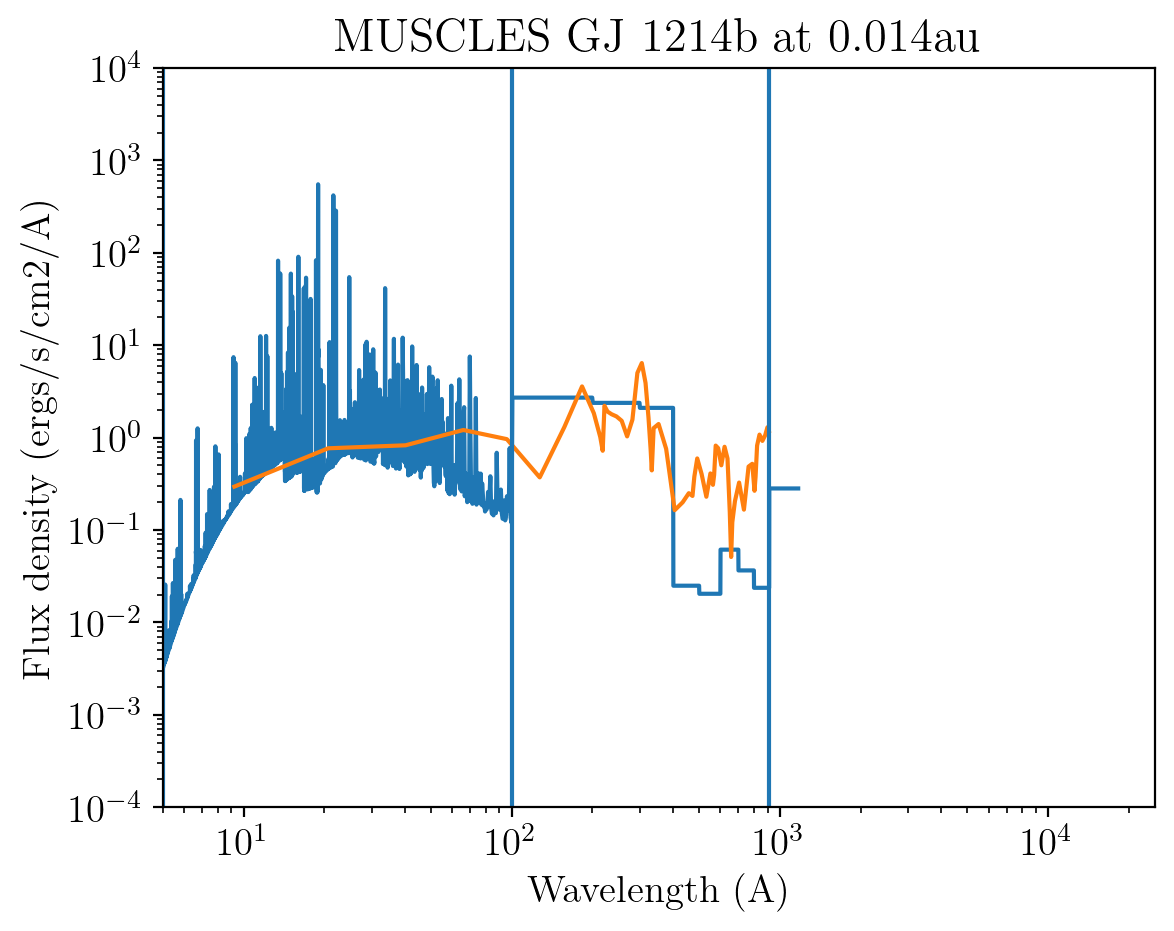

In [5]:
# print(hdu.data.names)
specs = hdu_EUV.data
specsx = hdu_Xray.data
# print(specs['WAVELENGTH0'])
# print(specs['WAVELENGTH1'])
wl = np.append(specsx['WAVELENGTH'][specsx['WAVELENGTH']<100],specs['WAVELENGTH'][specs['WAVELENGTH']>100])
delta_wle = specs['WAVELENGTH1'] - specs['WAVELENGTH0']
delta_wlx = specsx['WAVELENGTH1'] - specsx['WAVELENGTH0']
delta_wl = np.append(delta_wlx[specsx['WAVELENGTH']<100],delta_wle[specs['WAVELENGTH']>100])
flux_density = np.append(specsx['FLUX'][specsx['WAVELENGTH']<100]*2.25,specs['FLUX']*[specs['WAVELENGTH']>100]*1.229)*(14.6416*3.0857e18)**2/(0.014*const.au)**2
flux = flux_density*delta_wl
plt.plot(wl,flux_density)
plt.xscale('log')
plt.yscale('log')
plt.xlim(5,2.5e4)
plt.ylim(1e-4,1e4)
plt.title('MUSCLES GJ 1214b at 0.014au')
plt.ylabel('Flux density (ergs/s/cm2/A)')
plt.xlabel('Wavelength (A)')
plt.show()

plt.plot(wl,flux_density)
sim = wind_sim()
sim.load_planet('data/GJ1214b_13.6-2000eV_H-He_solar.csv')
wl_windae = const.hc/sim.windsoln.E_wl/1e-8
delta_wl_windae = np.diff(wl_windae,prepend=wl_windae[0]-(wl_windae[1]-wl_windae[0]))
plt.plot(wl_windae,sim.windsoln.F_wl/delta_wl_windae)
plt.xscale('log')
plt.yscale('log')
plt.xlim(5,2.5e4)
plt.ylim(1e-4,1e4)
plt.axvline(5)
plt.axvline(100)
plt.axvline(912)
plt.title('MUSCLES GJ 1214b at 0.014au')
plt.ylabel('Flux density (ergs/s/cm2/A)')
plt.xlabel('Wavelength (A)')
plt.show()

Atmosphere Composition
  Species:   HI,        HeI
  Mass frac: 8.00e-01, 2.00e-01

 Success! Average Ncol difference: 4.27e-02                                                         
Successfully converged Rmax to 7.109312 (Ncol also converged).                                                                                                    



<Figure size 1500x1000 with 0 Axes>

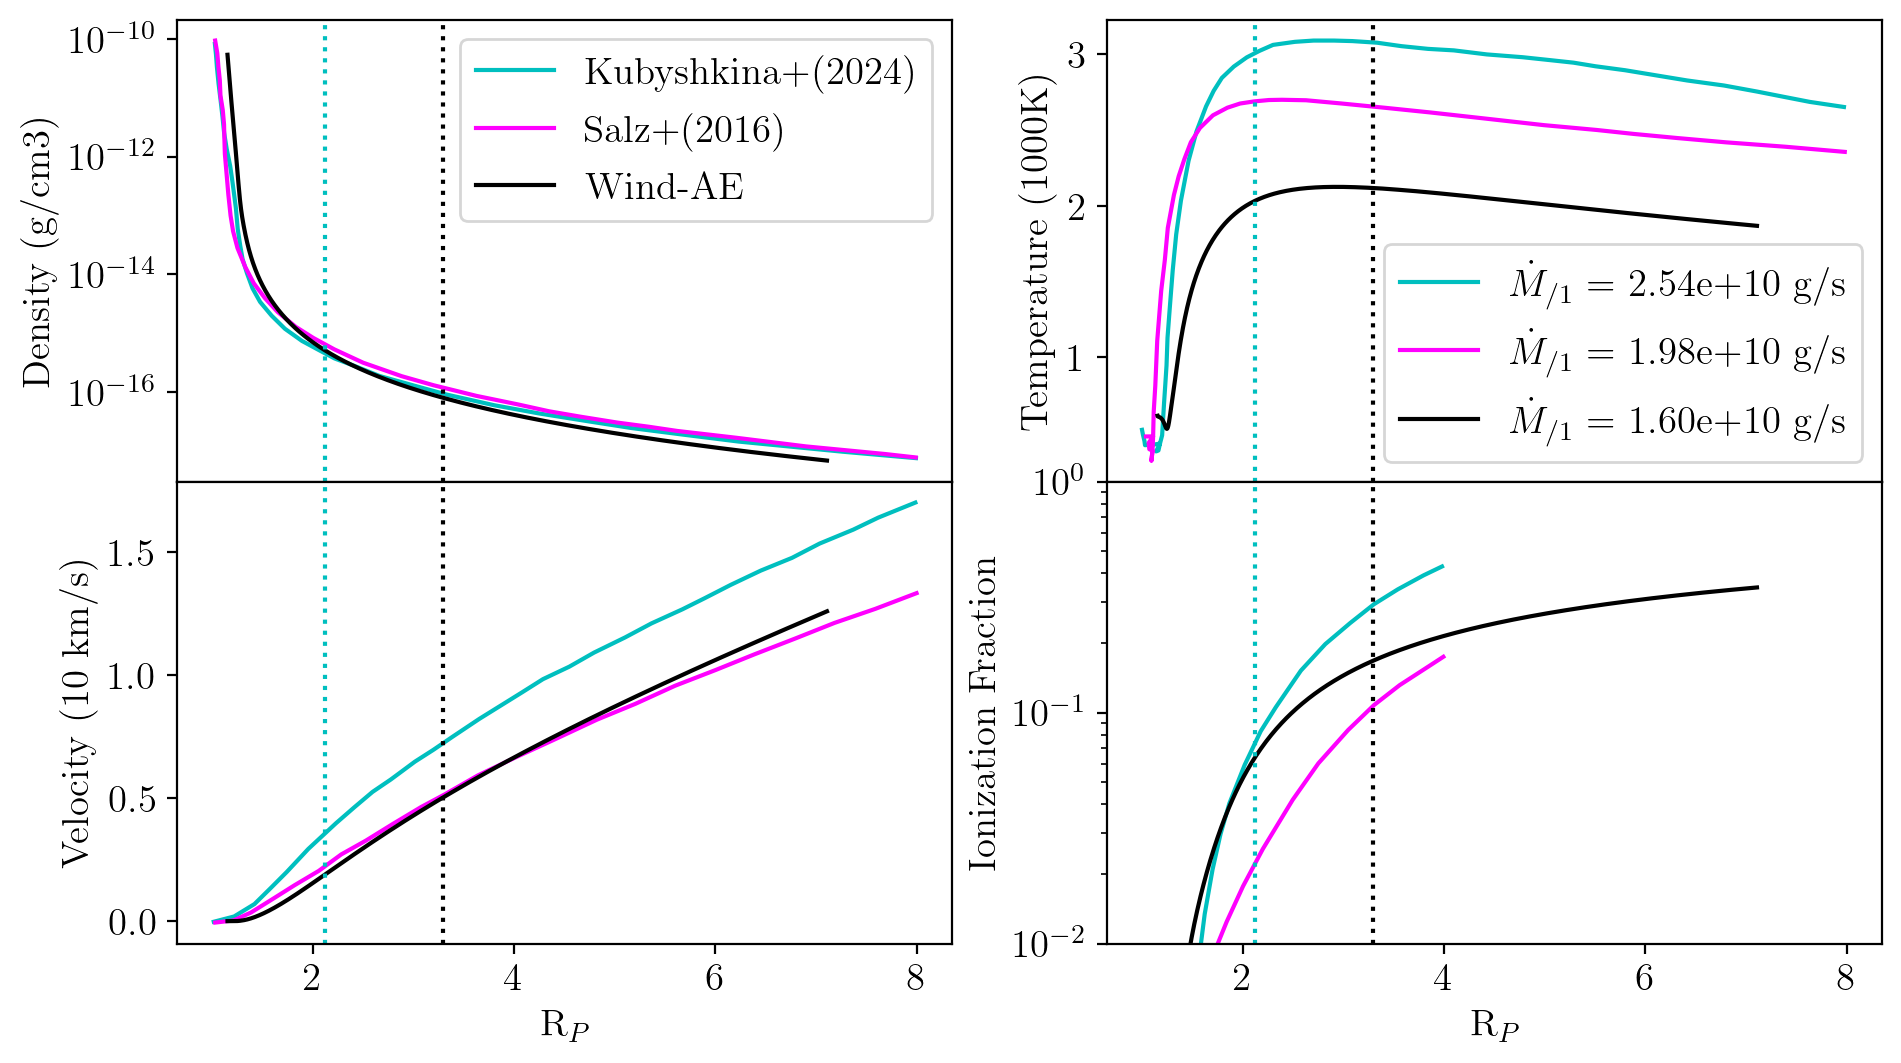

In [7]:
sim = wind_sim()
Rsp = 2.127
# sim.load_planet('saves/windsoln.csv')
path = 'data/'
sim.load_planet('data/Kubyshkina/GJ1214b_13.6-2000eV_H-He_solar.csv')
sim.converge_Rmax()
r = sim.windsoln.soln_norm['r']
plt.figure(figsize=[15,10])
kub = 'c'
tc='magenta'

fig, ax = plt.subplots(2,2,sharex=True,figsize=[11,6])
fig.subplots_adjust(hspace=0)

# ax[0,0] = plt.subplot(221)
r_v,v = np.genfromtxt(path+'Kubyshkina/kub_denisty.csv',delimiter=',',
                      skip_header=1).T #km/s
ax[0,0].plot(r_v,v,label='Kubyshkina+(2024)',c=kub)
r_v,v = np.genfromtxt(path+'Kubyshkina/tcpi_density.csv',delimiter=',',
                      skip_header=1).T #km/s
ax[0,0].plot(r_v,v,label='Salz+(2016)',c=tc)
ax[0,0].plot(r,sim.windsoln.soln['rho'],c='k',label='Wind-AE')
ax[0,0].axvline(sim.windsoln.R_sp,c='k',ls=':')
ax[0,0].axvline(Rsp,c=kub,ls=':')
ax[0,0].set_ylabel('Density (g/cm3)')
ax[0,0].set_xlabel(r'R$_P$')
ax[0,0].set_yscale('log')
ax[0,0].legend()

# plt.subplot(2,2,2)
# ax[1,0] = plt.subplot(222)
r_T,T = np.genfromtxt(path+'Kubyshkina/kub_temperature.csv',delimiter=',',
                      skip_header=1).T #1 K
ax[0,1].plot(r_T,T/1000,label=r'$\dot{M}_{/1}$ = %.2e g/s'%2.54e10,c=kub)
r_T,T = np.genfromtxt(path+'Kubyshkina/tcpi_temperature.csv',delimiter=',',
                      skip_header=1).T #1 K
ax[0,1].plot(r_T,T/1000,label=r'$\dot{M}_{/1}$ = %.2e g/s'%1.98e10,c=tc)
ax[0,1].plot(r,sim.windsoln.soln['T']/1000,c='k',label=r'$\dot{M}_{/1}$ = %.2e g/s'%(sim.windsoln.Mdot*3))
ax[0,1].axvline(sim.windsoln.R_sp,c='k',ls=':')
ax[0,1].axvline(Rsp,c=kub,ls=':')
ax[0,1].set_ylabel('Temperature (1000K)')
ax[0,1].set_xlabel(r'R$_P$')
ax[0,1].legend()
# plt.show()

# ax[0,1] = plt.subplot(223,sharex=ax[0,0])
r_v,v = np.genfromtxt(path+'Kubyshkina/kub_velocity.csv',delimiter=',',
                      skip_header=1).T #km/s
ax[1,0].plot(r_v,v/10,c=kub)
r_v,v = np.genfromtxt(path+'Kubyshkina/tcpi_velocity.csv',delimiter=',',
                      skip_header=1).T #km/s
ax[1,0].plot(r_v,v/10,c=tc)
ax[1,0].plot(r,sim.windsoln.soln['v']/1e5/10,c='k')
ax[1,0].axvline(sim.windsoln.R_sp,c='k',ls=':')
ax[1,0].axvline(Rsp,c=kub,ls=':')
ax[1,0].set_ylabel('Velocity (10 km/s)')
ax[1,0].set_xlabel(r'R$_P$')
# plt.show()

# ax[1,1] = plt.subplot(224,sharex=ax[1,0])
# plt.subplot(2,2,4)
r_v,v = np.genfromtxt(path+'Kubyshkina/kub_ionfrac.csv',delimiter=',',
                      skip_header=1).T #km/s
ax[1,1].plot(r_v,v,c=kub)
r_v,v = np.genfromtxt(path+'Kubyshkina/tcpi_ionfrac.csv',delimiter=',',
                      skip_header=1).T #km/s
ax[1,1].plot(r_v,v,c=tc)
ionfrac = (sim.windsoln.soln['n_HII']+sim.windsoln.soln['n_HeII'])/sim.windsoln.soln['n_tot']
ax[1,1].plot(r,ionfrac,c='k')
ax[1,1].axvline(sim.windsoln.R_sp,c='k',ls=':')
ax[1,1].axvline(Rsp,c=kub,ls=':')
ax[1,1].set_ylabel('Ionization Fraction')
ax[1,1].set_xlabel(r'R$_P$')
ax[1,1].set_ylim(1e-2,1)
ax[1,1].set_yticks([0.01,0.1])
ax[1,1].set_yticklabels(['0.01','0.1'])
ax[1,1].set_yscale('log')
plt.show()